## Sentimental analysis of news headlines

## import pandas. Pandas allows us to store data in a dataframe and also form plots.
## Numpy helps in conducting fast mathematical operations
## indian-news-headlines.csv is a comma separated file that is read by using 'read_csv' method from pandas¶

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Hafsa\Downloads\india-news-headlines.csv')

## View the dataframe

In [2]:
df

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


## Convert publish_date into date format

In [3]:
from datetime import datetime
df["publish_date"] = pd.to_datetime(df["publish_date"], format='%Y%m%d')

In [4]:
df

,publish_date,headline_category,headline_text
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,For bigwigs; it is destination Goa
...,...,...,...
3297167,2020-06-30,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,2020-06-30,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,2020-06-30,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,2020-06-30,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


## Count the number of times a headline category is repeated in  the datset

In [5]:
from collections import Counter
letter_counts = Counter(df['headline_category'])
new = pd.DataFrame.from_dict(letter_counts, orient ='index') 
new

,0
sports.wwe,69
unknown,207732
entertainment.hindi.bollywood,90374
india,285619
city.bengaluru,91857
...,...
elections.assembly-elections.jharkhand,10
sports.pti-sports-feed,25
elections.assembly-elections.delhi-assembly-elections,170
elections.assembly-elections.delhi,104


## Count the number of news headline each day

In [6]:
letter_counts = Counter(df['publish_date'])
new = pd.DataFrame.from_dict(letter_counts, orient ='index') 
new

,0
2001-01-01,1
2001-01-02,86
2001-01-03,41
2001-01-04,153
2001-01-05,126
...,...
2020-06-26,500
2020-06-27,527
2020-06-28,500
2020-06-29,516


## Number of headlines each year

In [7]:
new.groupby(new.index.year)
neww=new.groupby(new.index.year).agg(['sum'])
neww

,0
,sum
2001,56825
2002,113171
2003,97869
2004,65397
2005,47058
2006,61621
2007,86833
2008,127686
2009,205087


## Plot the same

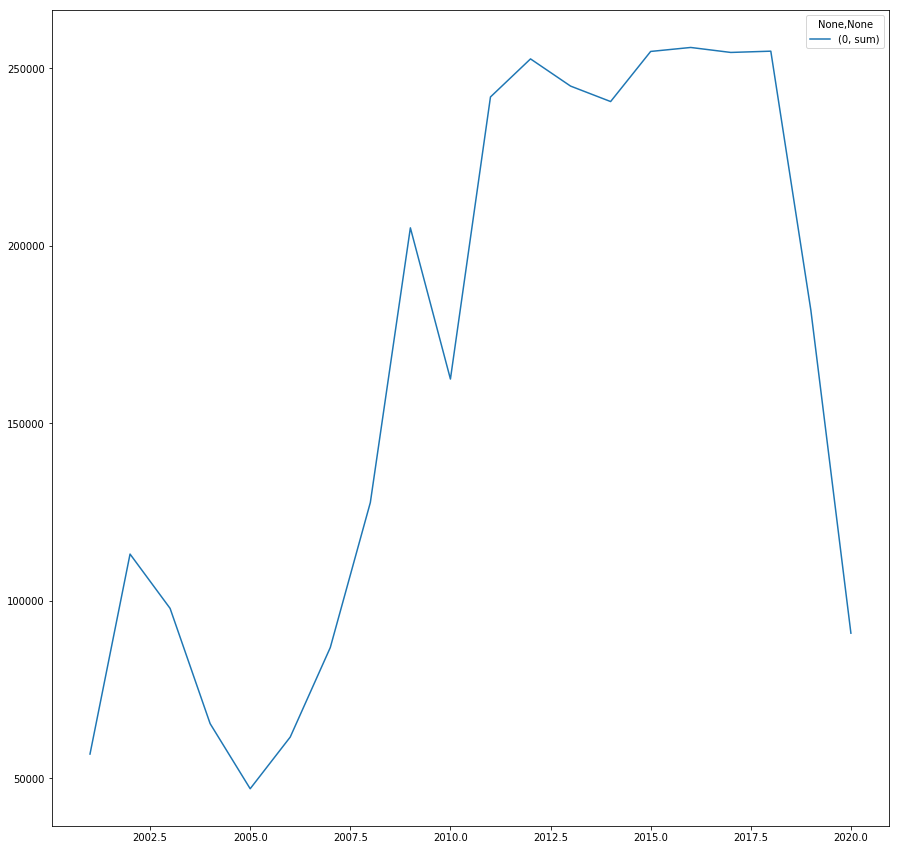

In [130]:
import matplotlib.pyplot as plt
neww.plot(kind='line', figsize=(15,15))
plt.show()

## Importing the libraries

In [9]:
from textblob import TextBlob
import matplotlib.pyplot as plt

## Number of news headlines per city: Use of headline category tags 

C:\Users\Hafsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


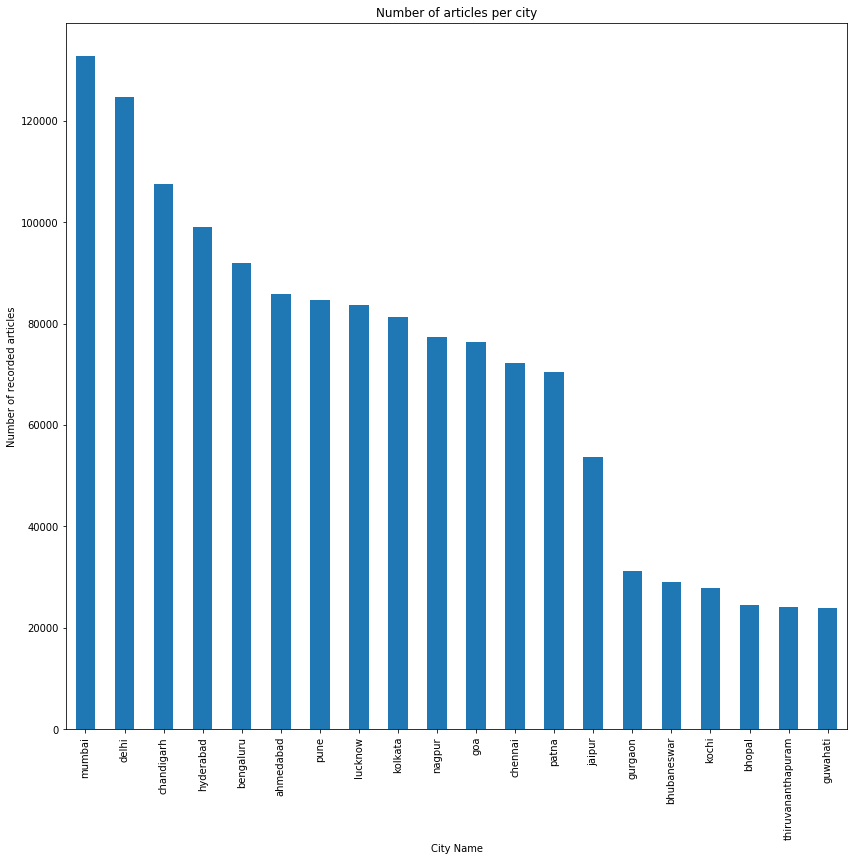

In [10]:
def label_plot(x, y, title):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
data_cities = df[df['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]
data_cities['city_name'] = data_cities.headline_category.str[5:]
city_list = data_cities['city_name'].unique().tolist()
#Bar chart of covrage by cities in descending order
grp_city = data_cities.groupby(['city_name'])['headline_text'].count().nlargest(20)
ts = pd.Series(grp_city)
ts.plot(kind='bar', figsize=(14,13))
label_plot('City Name', 'Number of recorded articles', 'Number of articles per city')
plt.show()

## Sentiment analysis using Textblob

In [10]:
def analyze_polarity(headline):
    result = TextBlob(headline)
    if result.sentiment.polarity > 0:
        return 1
    elif result.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [11]:
import numpy as np
df['Result'] = np.array([analyze_polarity(headline) for headline in df['headline_text']])

## Viewing the Result column with Sentiments

In [12]:
df

,publish_date,headline_category,headline_text,Result
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...,1
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,0
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,0
3,2001-01-02,unknown,America's unwanted heading for India?,0
4,2001-01-02,unknown,For bigwigs; it is destination Goa,0
...,...,...,...,...
3297167,2020-06-30,gadgets-news,why tiktok removed 1 65 crore videos in india,0
3297168,2020-06-30,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...,0
3297169,2020-06-30,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...,1
3297170,2020-06-30,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...,1


## Positive, negative, neutral news ratio

In [15]:
positive_headlines = [ head for index, head in enumerate(df['headline_text']) if df['Result'][index] > 0]
unbiased_headlines = [ head for index, head in enumerate(df['headline_text']) if df['Result'][index] == 0]
negative_headlines = [ head for index, head in enumerate(df['headline_text']) if df['Result'][index] < 0]

In [16]:
o_pos = len(positive_headlines)*100/len(df['headline_text'])
o_neg = len(negative_headlines)*100/len(df['headline_text'])
o_un = len(unbiased_headlines)*100/len(df['headline_text'])

In [17]:
print('Positive Headlines: ' + str(o_pos) + '\nNegative Headlines: ' + str(o_neg) + '\nUnbiased Headlines: ' + str(o_un))

Positive Headlines: 18.117920448190144
Negative Headlines: 12.076834329540588
Unbiased Headlines: 69.80524522226926


## Importing necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.corpus import stopwords

## Data preprocessing - Removing punctuations, stop words (common words)
## Reducing to same case (lower case)

In [19]:
df['headline_text']=df['headline_text'].str.replace('[^\w\s]',' ')
df['headline_text']=df['headline_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
stop=stopwords.words('english')
df['headline_text']=df['headline_text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
df = df[['publish_date', 'headline_text','Result']]
df = df.set_index('publish_date')
df

,headline_text,Result
publish_date,,
2001-01-01,win cena satisfying defeating undertaker bigge...,1
2001-01-02,status quo disturbed ayodhya says vajpayee,0
2001-01-02,fissures hurriyat pak visit,0
2001-01-02,america unwanted heading india,0
2001-01-02,bigwigs destination goa,0
...,...,...
2020-06-30,tiktok removed 1 65 crore videos india,0
2020-06-30,apurva asrani calls alia bhatts mother soni ra...,0
2020-06-30,kangana ranaut gets doll version team shares m...,1


## Have a look at the stopwords in NLTK for sake of knowledge

In [20]:
print(stop)
print(len(stop))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Import the library for lemmatization

In [21]:
from textblob import Word

## Lemmatization reduces words (features) to root words for more optimal sentiment prediction

In [22]:
data1 = df['headline_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data1

publish_date
2001-01-01    win cena satisfying defeating undertaker bigge...
2001-01-02            status quo disturbed ayodhya say vajpayee
2001-01-02                           fissure hurriyat pak visit
2001-01-02                       america unwanted heading india
2001-01-02                               bigwig destination goa
                                    ...                        
2020-06-30                tiktok removed 1 65 crore video india
2020-06-30    apurva asrani call alia bhatts mother soni raz...
2020-06-30    kangana ranaut get doll version team share man...
2020-06-30    meezaan jaffrey reminisces childhood day grand...
2020-06-30    prabhas20 titled radhe shyam prabhas pooja heg...
Name: headline_text, Length: 3297172, dtype: object

## have a look at the power of the lemmatizer

In [23]:
Word("corpora").lemmatize()

'corpus'

## Updating the lemmatized text to the dataframe

In [25]:
df['headline_text'] = data1

In [26]:
df

,headline_text,Result
publish_date,,
2001-01-01,win cena satisfying defeating undertaker bigge...,1
2001-01-02,status quo disturbed ayodhya say vajpayee,0
2001-01-02,fissure hurriyat pak visit,0
2001-01-02,america unwanted heading india,0
2001-01-02,bigwig destination goa,0
...,...,...
2020-06-30,tiktok removed 1 65 crore video india,0
2020-06-30,apurva asrani call alia bhatts mother soni raz...,0
2020-06-30,kangana ranaut get doll version team share man...,1


## Train-test split
## Tokening the text into numerical values using count vectorizer

In [27]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(df['headline_text'].values,df['Result'].values,test_size=0.2)
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ',s).split()
vect = CountVectorizer(tokenizer=tokenize)
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

## View at how the tokenized words appear

In [28]:
print(tf_train)
print(tf_test)

  (0, 29313)	1
  (0, 138460)	1
  (0, 73862)	1
  (0, 163924)	1
  (1, 50764)	1
  (1, 42466)	1
  (1, 176767)	1
  (1, 10426)	1
  (1, 39798)	1
  (1, 29875)	1
  (1, 112266)	1
  (1, 59318)	1
  (2, 27720)	1
  (2, 39859)	1
  (2, 132954)	1
  (2, 135018)	1
  (3, 152300)	1
  (3, 149766)	1
  (3, 173722)	1
  (3, 122018)	1
  (3, 16947)	1
  (4, 48786)	1
  (4, 72628)	1
  (5, 135087)	1
  (5, 39210)	1
  :	:
  (2637732, 33163)	1
  (2637732, 174613)	1
  (2637732, 45443)	1
  (2637732, 98452)	1
  (2637733, 32082)	1
  (2637733, 41593)	1
  (2637733, 176767)	1
  (2637734, 47884)	1
  (2637734, 122979)	1
  (2637734, 111614)	1
  (2637734, 72094)	1
  (2637734, 111937)	1
  (2637735, 57922)	1
  (2637735, 45699)	1
  (2637735, 45406)	1
  (2637735, 116511)	1
  (2637735, 69623)	1
  (2637735, 71097)	1
  (2637736, 36997)	1
  (2637736, 65635)	1
  (2637736, 54257)	1
  (2637736, 140097)	1
  (2637736, 81206)	1
  (2637736, 113750)	1
  (2637736, 143886)	1
  (0, 36302)	1
  (0, 111585)	1
  (0, 150533)	1
  (0, 153249)	1
  (1, 10694

## Using Multinomial Naive Bayes model and view the accuracy metrics
## Accuracy = 91%

In [29]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(tf_train,Y_train)
pred=nb.predict(tf_test)
accuracy=(pred == Y_test).mean()
print(accuracy)
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

0.9104430307763464
[[ 60950  13143   5795]
 [  6962 442420  10630]
 [  4576  17951  97008]]
             precision    recall  f1-score   support

         -1       0.84      0.76      0.80     79888
          0       0.93      0.96      0.95    460012
          1       0.86      0.81      0.83    119535

avg / total       0.91      0.91      0.91    659435



## Using Ensemble Adaboost model with internal 150 Decision trees and view the accuracy metrics
## Accuracy = 88.8%

In [15]:
from sklearn.ensemble import AdaBoostClassifier
adaboost= AdaBoostClassifier(n_estimators=150)
adaboost.fit(tf_train,Y_train)
pred=adaboost.predict(tf_test)
accuracy=(pred == Y_test).mean()
print(accuracy)
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

0.888052651133167
[[ 52038  24179   2886]
 [  3801 451783   5415]
 [  2560  34981  81792]]
             precision    recall  f1-score   support

         -1       0.89      0.66      0.76     79103
          0       0.88      0.98      0.93    460999
          1       0.91      0.69      0.78    119333

avg / total       0.89      0.89      0.88    659435



# Stock price prediction

## import pandas. Pandas allows us to store data in a dataframe and also form plots. Numpy helps in conducting fast mathematical operations

In [3]:
import pandas as pd
import numpy as np

## BSESN.csv is a comma separated file that is read by using 'read_csv' method from pandas

In [31]:
dff = pd.read_csv(r'C:/Users/Hafsa/Downloads/BSESN.csv')
dff

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-03,41634.511719,41636.179688,41348.679688,41464.609375,41464.609375,8900.0
1,2020-01-06,41378.339844,41378.339844,40613.960938,40676.628906,40676.628906,8700.0
2,2020-01-07,40983.039063,41230.140625,40727.371094,40869.468750,40869.468750,11900.0
3,2020-01-08,40574.828125,40866.359375,40476.550781,40817.738281,40817.738281,18200.0
4,2020-01-09,41216.671875,41482.121094,41175.718750,41452.351563,41452.351563,7800.0
...,...,...,...,...,...,...,...
245,2020-12-28,47153.589844,47406.718750,47148.238281,47353.750000,47353.750000,9600.0
246,2020-12-29,47466.621094,47714.550781,47361.898438,47613.078125,47613.078125,12800.0
247,2020-12-30,47789.031250,47807.851563,47358.359375,47746.218750,47746.218750,15600.0
248,2020-12-31,47753.109375,47896.968750,47602.121094,47751.328125,47751.328125,13900.0


## Date, open rate, highest value, lowest value, the 'Adjusted close', the closing value at the end of the trading day.

## We will learn the data type of each column.

In [32]:
dff['Date'] = pd.to_datetime(dff['Date'])
dff.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

## We will set Date column as the index of the dataframe for future Date analysis of the stock data

In [33]:
dff = dff.set_index('Date')
dff

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-03,41634.511719,41636.179688,41348.679688,41464.609375,41464.609375,8900.0
2020-01-06,41378.339844,41378.339844,40613.960938,40676.628906,40676.628906,8700.0
2020-01-07,40983.039063,41230.140625,40727.371094,40869.468750,40869.468750,11900.0
2020-01-08,40574.828125,40866.359375,40476.550781,40817.738281,40817.738281,18200.0
2020-01-09,41216.671875,41482.121094,41175.718750,41452.351563,41452.351563,7800.0
...,...,...,...,...,...,...
2020-12-28,47153.589844,47406.718750,47148.238281,47353.750000,47353.750000,9600.0
2020-12-29,47466.621094,47714.550781,47361.898438,47613.078125,47613.078125,12800.0
2020-12-30,47789.031250,47807.851563,47358.359375,47746.218750,47746.218750,15600.0


## Let us check if it worked

In [34]:
dff.index

DatetimeIndex(['2020-01-03', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-13', '2020-01-14',
               '2020-01-15', '2020-01-16',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-01'],
              dtype='datetime64[ns]', name='Date', length=250, freq=None)

## Data Analysis

## Pandas has a method asfreq() to set the frequency of the Date column as you like - month, daily, etc.
## D - daily W- Weekly, M - Monthly
## Finding the weekly mean of the data 

In [35]:
data_freq = dff.asfreq('D')
data_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data_weekly_mean = data_freq[data_columns].resample('W').mean() # W stands for weekly
data_weekly_mean

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-05,41634.511719,41636.179688,41348.679688,41464.609375,41464.609375,8900.0
2020-01-12,41144.215625,41346.414063,40888.280469,41083.181250,41083.181250,11960.0
2020-01-19,41898.983594,41997.425781,41760.467969,41912.596094,41912.596094,9380.0
2020-01-26,41557.247656,41689.948438,41246.244531,41393.537500,41393.537500,8120.0
2020-02-02,41293.725782,41343.801562,40920.268750,40991.589844,40991.589844,8560.0
2020-02-09,40681.001562,40962.135938,40514.064063,40850.446094,40850.446094,14020.0
2020-02-16,41379.672656,41539.983594,41166.082031,41295.837500,41295.837500,10280.0
2020-02-23,41205.743164,41304.972657,40956.191407,41110.797851,41110.797851,8300.0
2020-03-01,40152.978125,40172.734375,39586.115625,39715.267969,39715.267969,9340.0


## Heatmap

In [4]:
import seaborn as sns

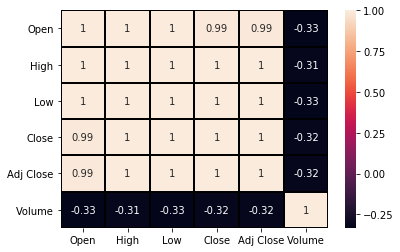

In [37]:
sns.heatmap(dff.corr(), annot=True, linewidths=1, linecolor="black")

## Plotting the same

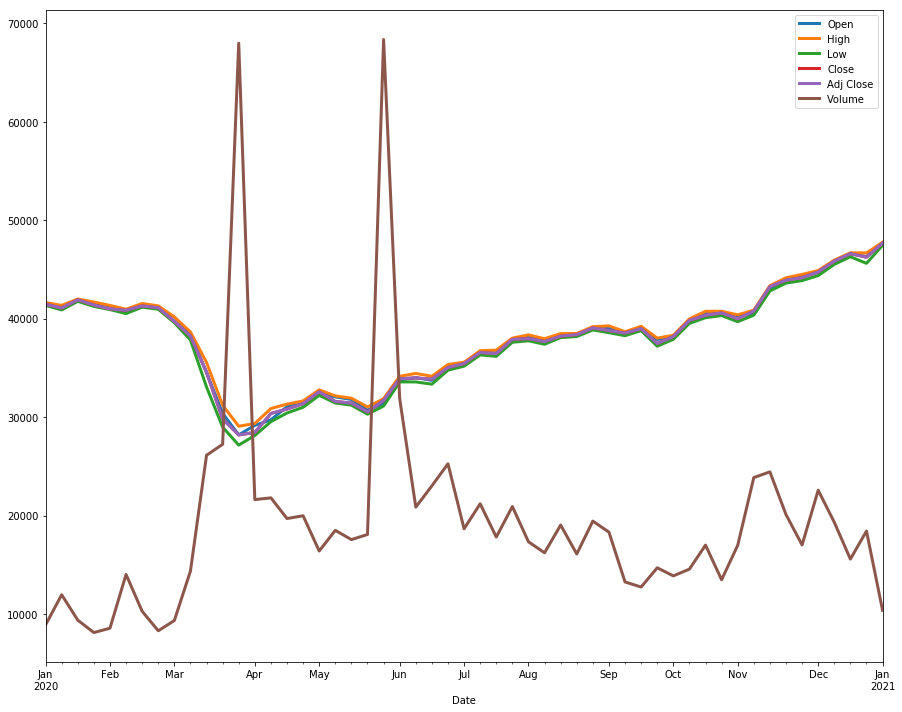

In [38]:
import matplotlib.pyplot as plt
data_weekly_mean.plot(linewidth = 3.0, figsize=(15, 12))
plt.show()

## Finding the monthly mean of the data

In [39]:
data_monthly_mean = data_freq[data_columns].resample('M').mean() # W stands for weekly
data_monthly_mean

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-31,41481.208334,41596.387091,41210.713728,41350.911086,41350.911086,9476.190476
2020-02-29,40836.380757,40978.640008,40534.530222,40723.734170,40723.734170,10600.000000
2020-03-31,32469.389509,33150.841332,31386.098772,32254.451358,32254.451358,33428.571429
2020-04-30,30988.895291,31408.687175,30540.598850,30966.008572,30966.008572,19255.555556
2020-05-31,31492.608347,31739.273129,31011.178968,31294.248458,31294.248458,28636.842105
2020-06-30,34221.708363,34575.692472,33899.159535,34262.875178,34262.875178,24631.818182
2020-07-31,37046.053499,37272.704314,36765.819124,37030.641474,37030.641474,19256.521739
2020-08-31,38416.740142,38603.091704,38140.786272,38346.588170,38346.588170,18185.714286
2020-09-30,38462.071555,38657.366477,38134.613814,38378.977806,38378.977806,14081.818182


## Plotting the same

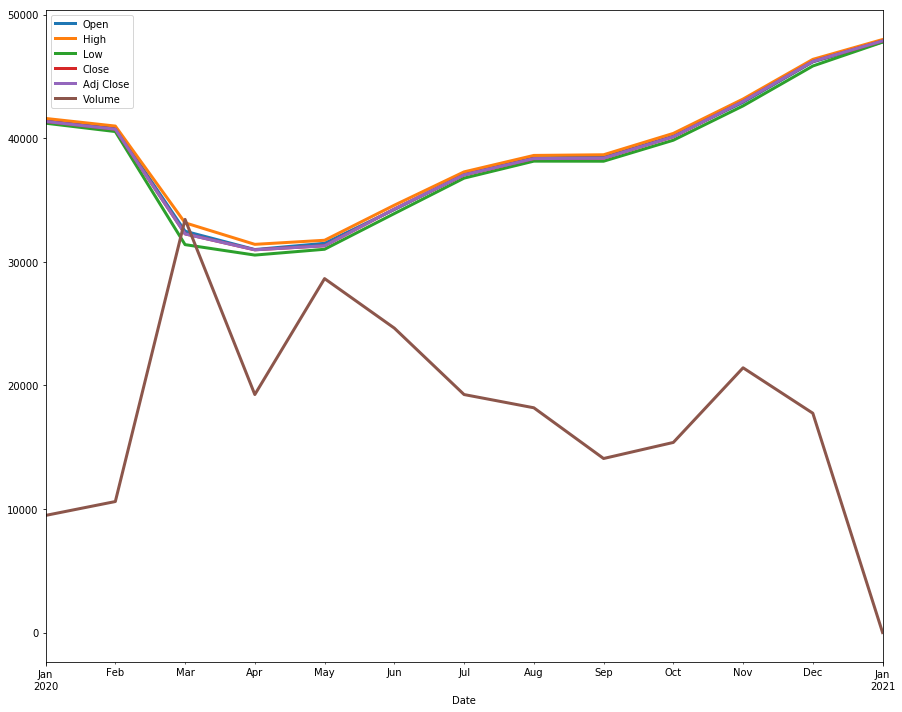

In [40]:
data_monthly_mean.plot(linewidth = 3.0, figsize=(15, 12))
plt.show()

## View the statistical values of the columns

In [41]:
dff.describe()

,Open,High,Low,Close,Adj Close,Volume
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,38011.203878,38282.144280,37619.815285,37952.162815,37952.162815,19236.947791
std,4816.829867,4698.219186,4941.940019,4845.427213,4845.427213,16408.581065
min,26499.810547,27462.869141,25638.900391,25981.240234,25981.240234,0.000000
25%,34335.378906,34769.480469,33958.019531,34247.050781,34247.050781,13500.000000
50%,38480.890625,38746.480469,38219.968750,38417.230469,38417.230469,16900.000000
75%,41183.390625,41370.910156,41030.171875,41115.378906,41115.378906,21000.000000
max,47789.031250,47980.359375,47771.148438,47868.980469,47868.980469,188300.000000


## Forecasting part
## Importing the Arima model

In [4]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARIMA

## Scatter plot view of the data

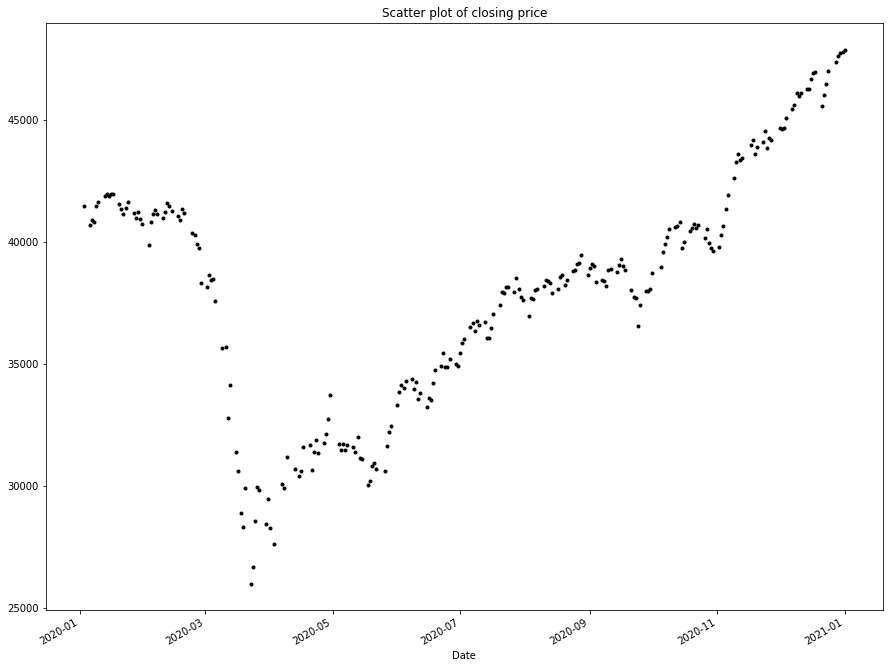

In [43]:
df_close = dff['Close']
df_close.plot(style='k.' , figsize=(15, 12))
plt.title('Scatter plot of closing price')
plt.show()

## Import Accuracy metrics

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Fill the missing NaN values with the mean of the data

In [45]:
dff = dff.asfreq('D')
dff

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-03,41634.511719,41636.179688,41348.679688,41464.609375,41464.609375,8900.0
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,41378.339844,41378.339844,40613.960938,40676.628906,40676.628906,8700.0
2020-01-07,40983.039063,41230.140625,40727.371094,40869.468750,40869.468750,11900.0
...,...,...,...,...,...,...
2020-12-28,47153.589844,47406.718750,47148.238281,47353.750000,47353.750000,9600.0
2020-12-29,47466.621094,47714.550781,47361.898438,47613.078125,47613.078125,12800.0
2020-12-30,47789.031250,47807.851563,47358.359375,47746.218750,47746.218750,15600.0


In [46]:
dff = dff.fillna(method='bfill')
dff

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-03,41634.511719,41636.179688,41348.679688,41464.609375,41464.609375,8900.0
2020-01-04,41378.339844,41378.339844,40613.960938,40676.628906,40676.628906,8700.0
2020-01-05,41378.339844,41378.339844,40613.960938,40676.628906,40676.628906,8700.0
2020-01-06,41378.339844,41378.339844,40613.960938,40676.628906,40676.628906,8700.0
2020-01-07,40983.039063,41230.140625,40727.371094,40869.468750,40869.468750,11900.0
...,...,...,...,...,...,...
2020-12-28,47153.589844,47406.718750,47148.238281,47353.750000,47353.750000,9600.0
2020-12-29,47466.621094,47714.550781,47361.898438,47613.078125,47613.078125,12800.0
2020-12-30,47789.031250,47807.851563,47358.359375,47746.218750,47746.218750,15600.0


## Calculate rolling mean and standard deviation

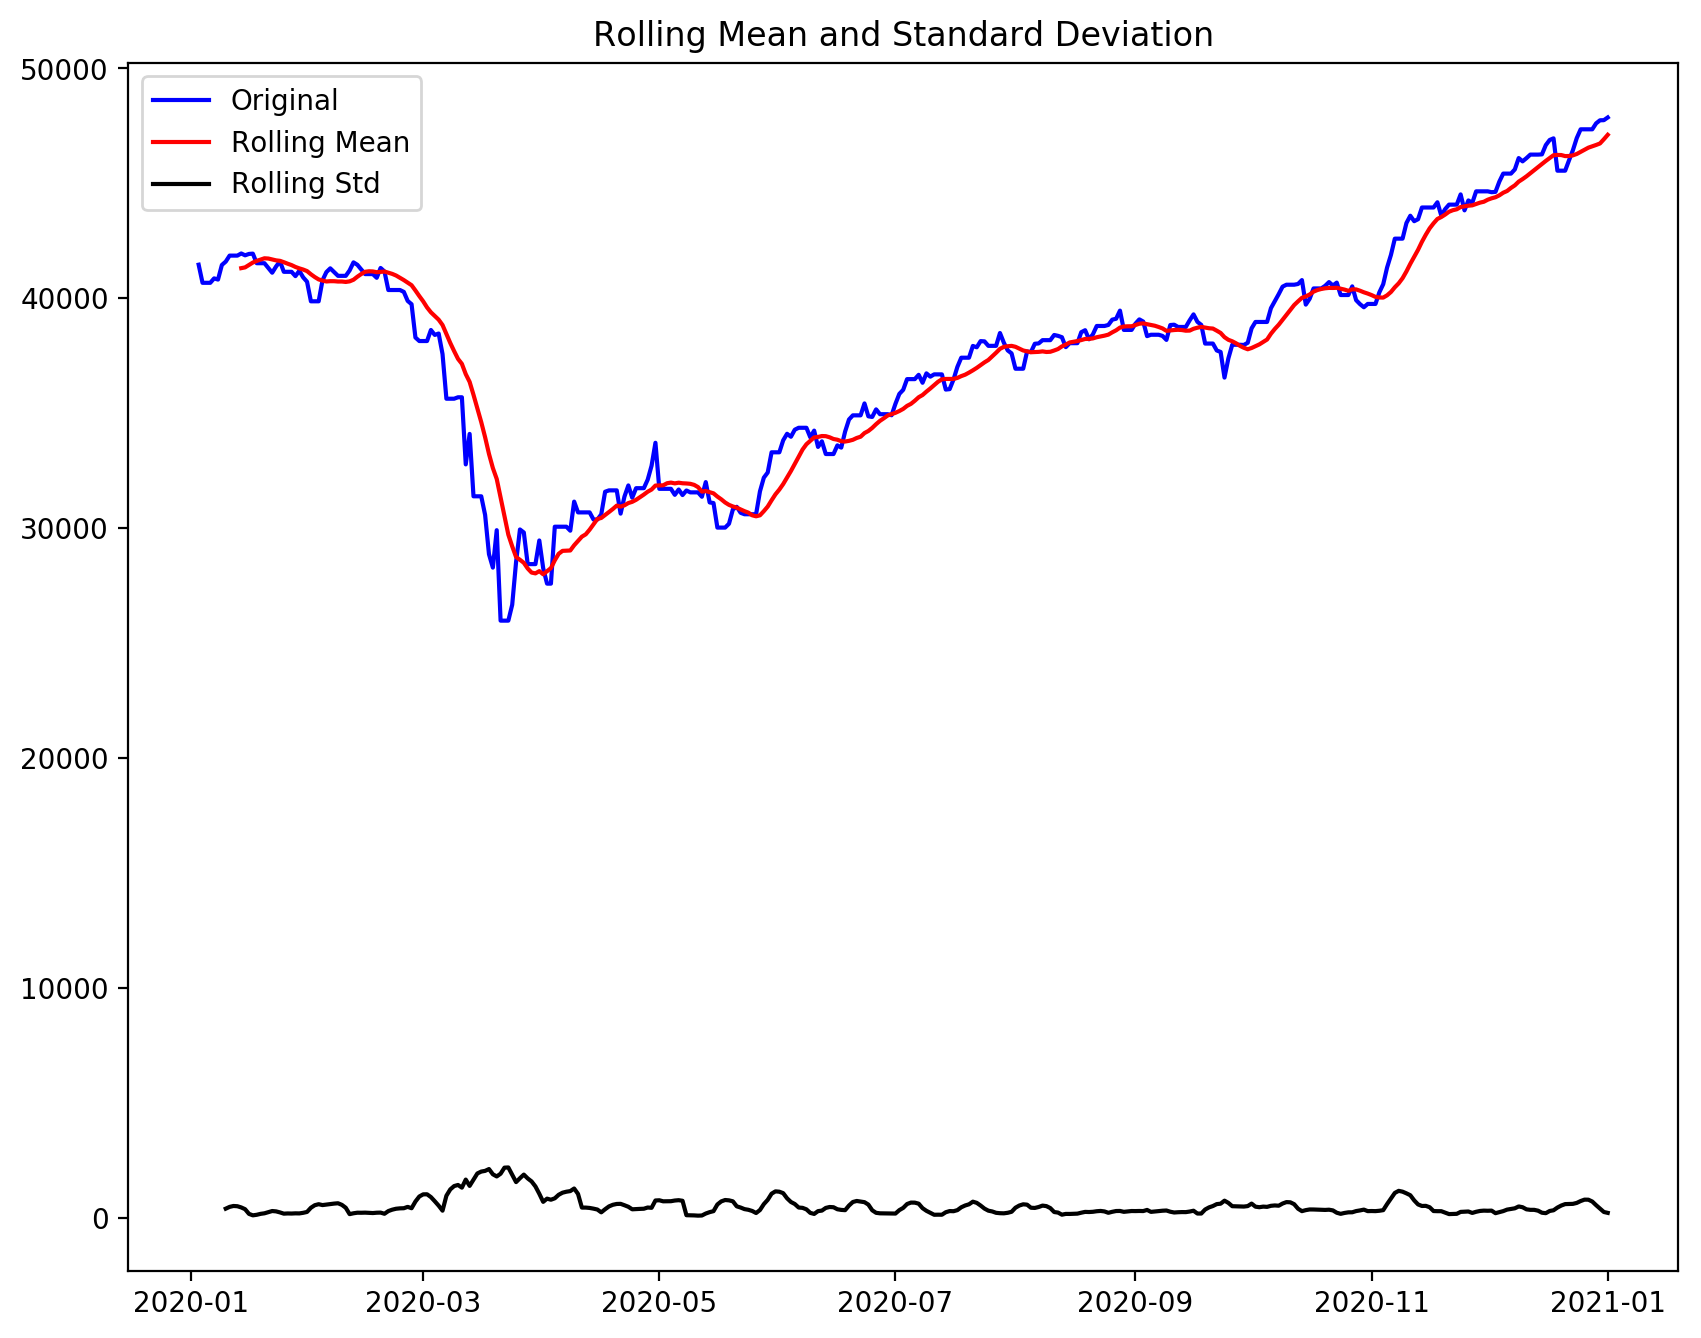

In [112]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(8).std()
    #Plot rolling statistics:
    plt.figure(figsize=(10,8), dpi=200)
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()
        
test_stationarity(dff['Close'])

## Filter the dataset to hold only the closing pricing where prediction will be done

In [48]:
dff = dff[["Close"]]

In [49]:
dff

,Close
Date,
2020-01-03,41464.609375
2020-01-04,40676.628906
2020-01-05,40676.628906
2020-01-06,40676.628906
2020-01-07,40869.468750
...,...
2020-12-28,47353.750000
2020-12-29,47613.078125
2020-12-30,47746.218750


## Split into train and test dataset

In [50]:
print(dff.shape)
train=dff.iloc[:292]
test=dff.iloc[292:]
print(train.shape,test.shape)

(365, 1)
(292, 1) (73, 1)


## View train set

In [51]:
train

,Close
Date,
2020-01-03,41464.609375
2020-01-04,40676.628906
2020-01-05,40676.628906
2020-01-06,40676.628906
2020-01-07,40869.468750
...,...
2020-10-16,39982.980469
2020-10-17,40431.601563
2020-10-18,40431.601563


## View test set

In [53]:
test

,Close
Date,
2020-10-21,40707.308594
2020-10-22,40558.488281
2020-10-23,40685.500000
2020-10-24,40145.500000
2020-10-25,40145.500000
...,...
2020-12-28,47353.750000
2020-12-29,47613.078125
2020-12-30,47746.218750


## View train shape

In [52]:
train.shape

(292, 1)

## View test shape

In [54]:
test.shape

(73, 1)

## Auto Regressive Integrated Moving Average model

In [55]:
model=ARIMA(train['Close'],order=(0,2,13))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Close   No. Observations:                  290
Model:                ARIMA(0, 2, 13)   Log Likelihood               -2247.608
Method:                       css-mle   S.D. of innovations            555.974
Date:                Thu, 14 Jan 2021   AIC                           4525.216
Time:                        13:02:35   BIC                           4580.264
Sample:                    01-05-2020   HQIC                          4547.271
                         - 10-20-2020                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6517      0.476      1.369      0.171      -0.281       1.585
ma.L1.D2.Close     -1.0495      0.060    -17.509      0.000      -1.167      -0.932
ma.L2.D2.Close      0.0793      0.085      0.931      0.352      -0.088       0.246
ma.L3.D2.Close     -0.0533      0.086     -0.618      0.536      -0.222       0.116
ma.L4.D2.Close     -0.0129      0.085     -0.151      0.880      -0.180       0.154
ma.L5.D2.Close      0.1302      0.088      1.477      0.140      -0.043       0.303
ma.L6.D2.Close     -0.0974      0.078     -1.255      0.209      -0.250       0.055
ma.L7.D2.Close      0.2504      0.085      2.950      0.003       0.084       0.417
ma.L8.D2.Close     -0.4519      0.097     -4.662      0.000      -0.642      -0.262
ma.L9.D2.Close      0.2799      0.086      3.265      0.001       0.112       0.448
ma.L10.D2.Close     0.0165      0.074      0.222      0.824      -0.129       0.162
ma.L11.D2.Close    -0.0772      0.103     -0.747      0.455      -0.279       0.125
ma.L12.D2.Close     0.0022      0.090      0.024      0.981      -0.175       0.179
ma.L13.D2.Close    -0.0163      0.078     -0.207      0.836      -0.170       0.137
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
MA.1             1.0000           -0.0000j            1.0000           -0.0000
MA.2             1.1265           -0.4101j            1.1989           -0.0556
MA.3             1.1265           +0.4101j            1.1989            0.0556
MA.4             0.8579           -0.9568j            1.2851           -0.1337
MA.5             0.8579           +0.9568j            1.2851            0.1337
MA.6             0.0416           -1.1447j            1.1454           -0.2442
MA.7             0.0416           +1.1447j            1.1454            0.2442
MA.8            -0.7202           -0.8537j            1.1169           -0.3615
MA.9            -0.7202           +0.8537j            1.1169            0.3615
MA.10           -1.1099           -0.0000j            1.1099           -0.5000
MA.11           -1.9636           -0.0000j            1.9636           -0.5000
MA.12           -0.2015           -2.6879j            2.6954           -0.2619
MA.13           -0.2015           +2.6879j            2.6954            0.2619
------------------------------------------------------------------------------
"""

## Forecasting using ARIMA

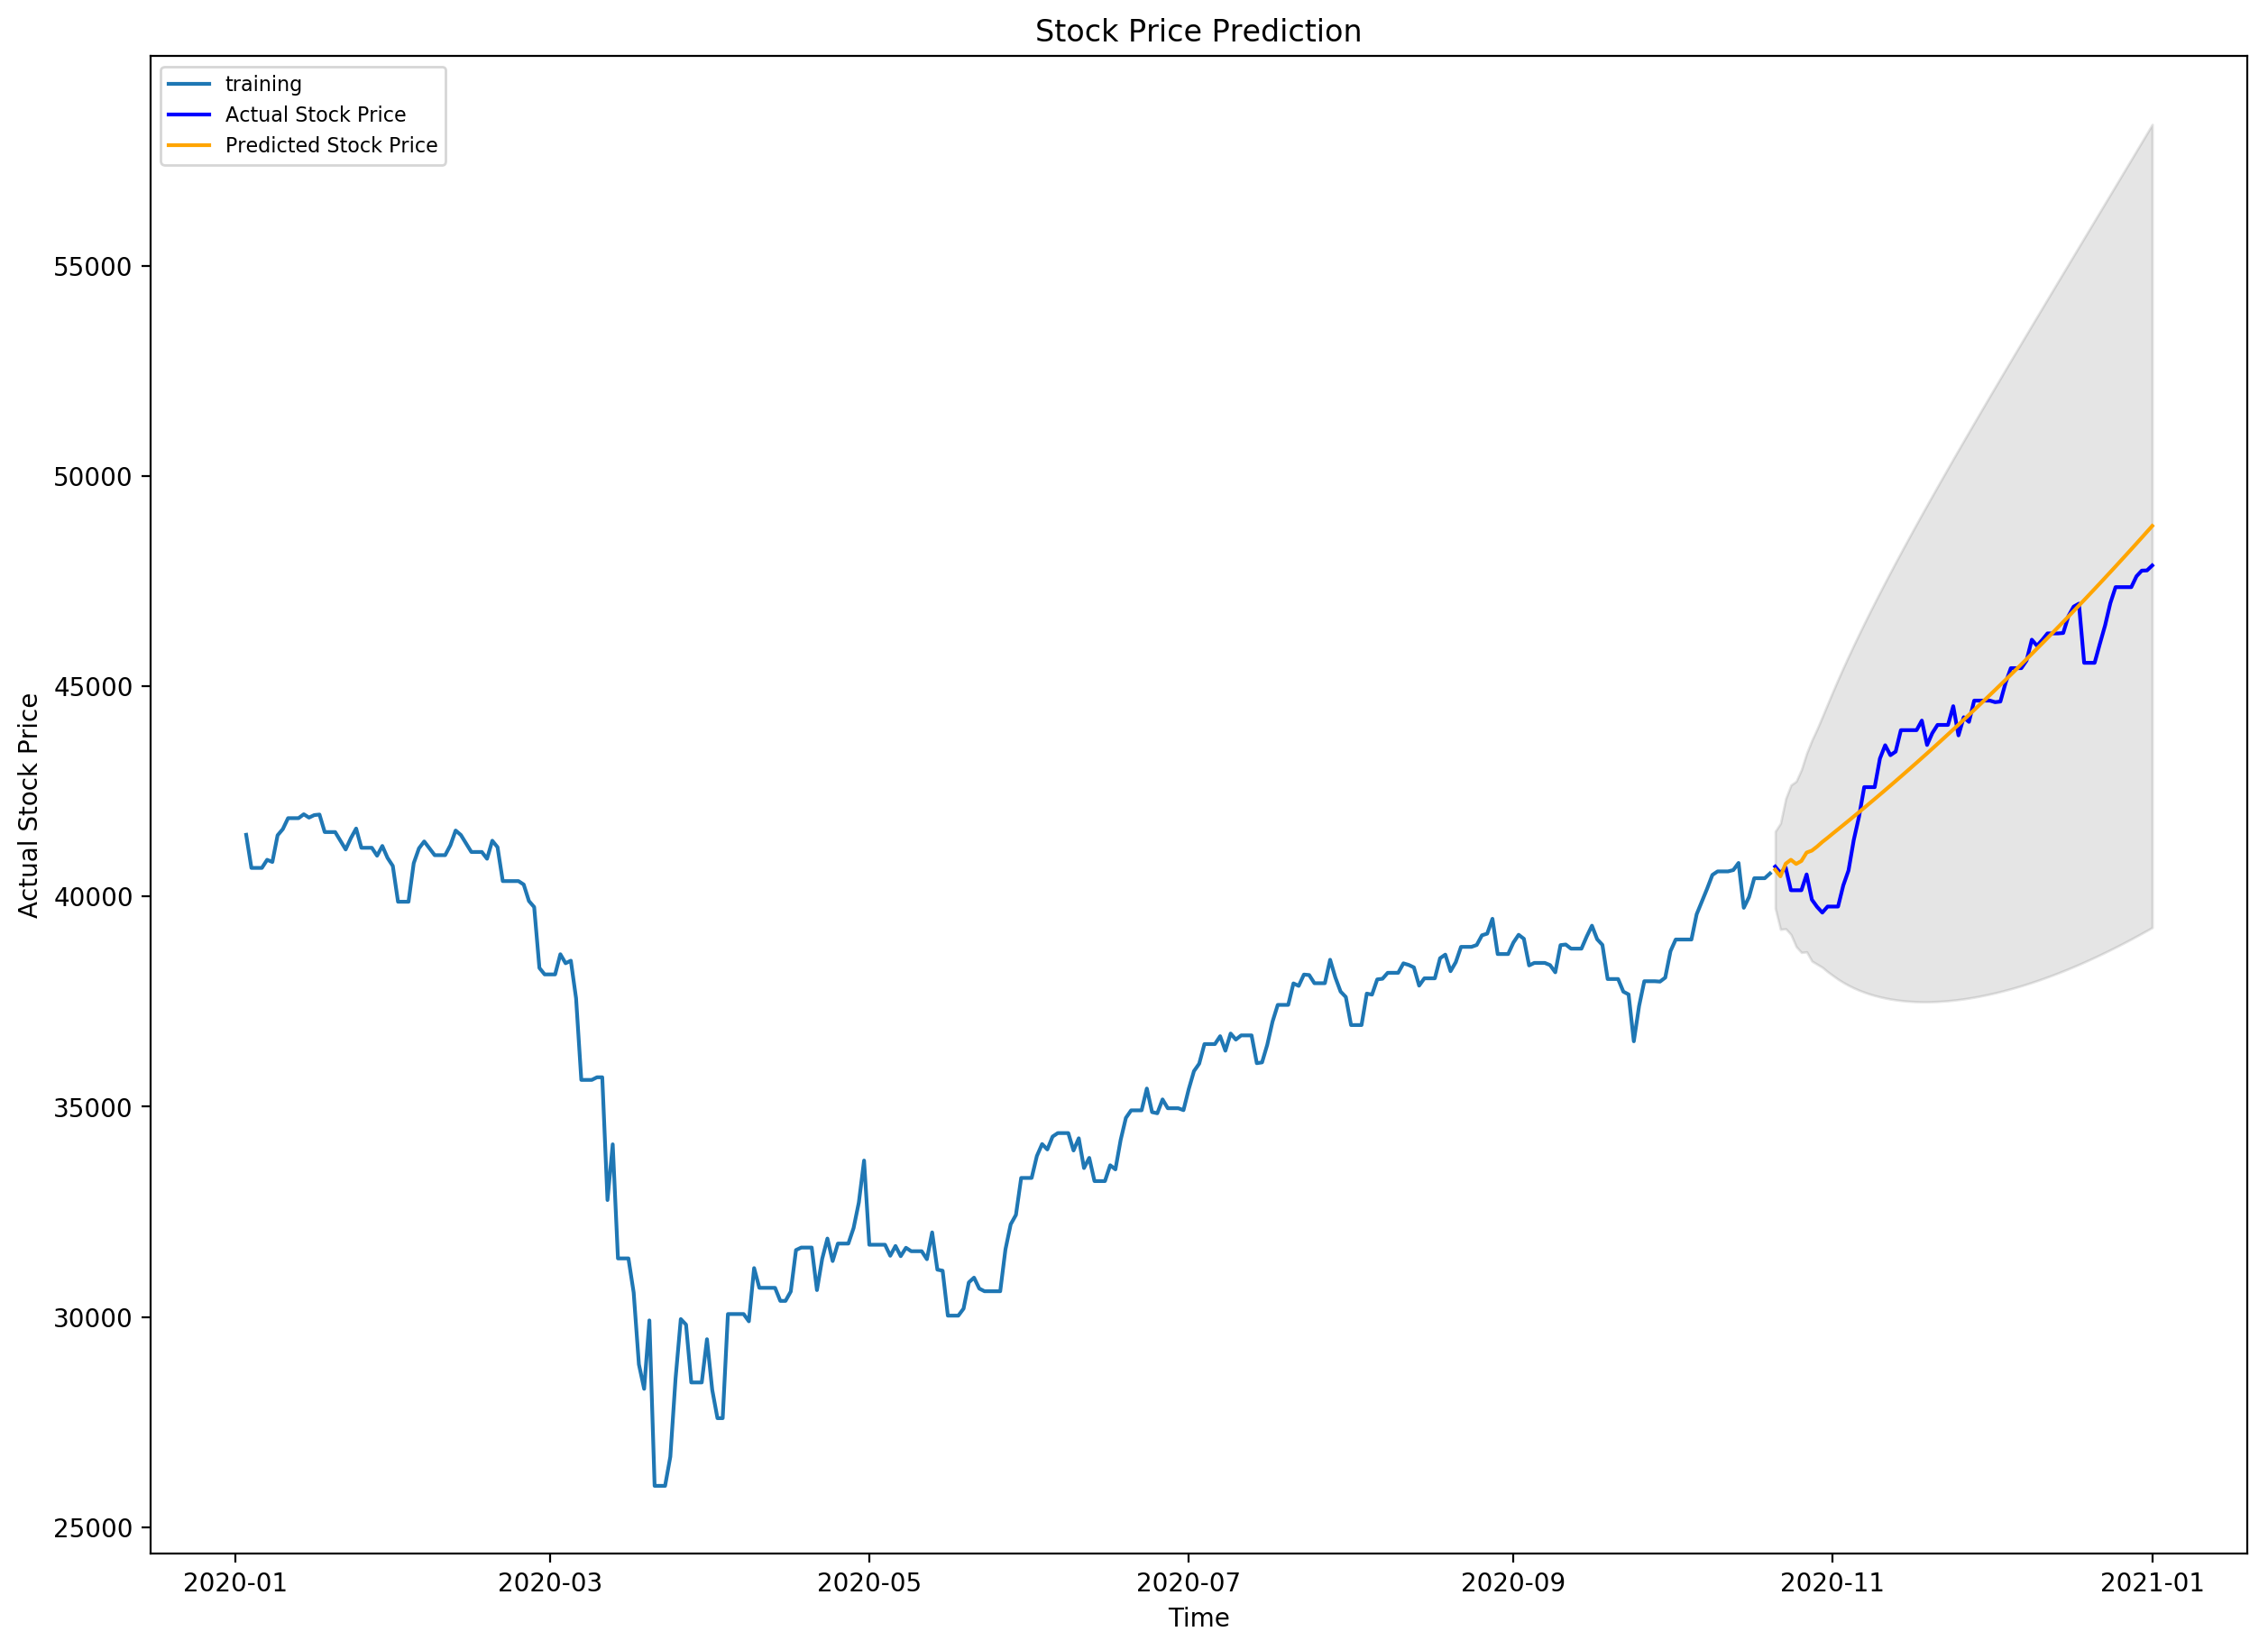

In [56]:
fc, se, conf = model.forecast(73, alpha=0.10)  # 95% confidence
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
plt.figure(figsize=(15,11), dpi=200)
plt.plot(train, label='training')
plt.plot(test, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [58]:
fc_series

Date
2020-10-21    40632.219071
2020-10-22    40476.923219
2020-10-23    40777.234956
2020-10-24    40870.099777
2020-10-25    40771.218838
                  ...     
2020-12-28    48255.262169
2020-12-29    48392.775168
2020-12-30    48530.939887
2020-12-31    48669.756327
2021-01-01    48809.224487
Freq: D, Length: 73, dtype: float64

## Report

In [59]:
mape = np.mean(np.abs(fc_series-test['Close'])/np.abs(test['Close']))
print('Mean_absolute_percentage_error: '+str(mape))

Mean_absolute_percentage_error: 0.014078567490000797


## Combining the datasets

In [60]:
df.tail(50)

,headline_text,Result
publish_date,,
2020-06-30,concern govt reason nrega boom,0
2020-06-30,key covid 19 drug hit custom check port,0
2020-06-30,top minister discus ban chinese 5g equipment,1
2020-06-30,priyanka chopra share sweet wish joe jonas sop...,1
2020-06-30,maharashtra tamil nadu extend lockdown till ju...,0
2020-06-30,internal policing must check balance,0
2020-06-30,madras magician wowed sw19 60 year ago,0
2020-06-30,india bhutan launch 1st joint hydel project,0
2020-06-30,repatriation flight go empty china,-1


In [61]:
dff.tail(50)

,Close
Date,
2020-11-13,43443.000000
2020-11-14,43952.710938
2020-11-15,43952.710938
2020-11-16,43952.710938
2020-11-17,43952.710938
2020-11-18,44180.050781
2020-11-19,43599.960938
2020-11-20,43882.250000
2020-11-21,44077.148438


In [86]:
s_data = df.merge(dff, left_index=True, right_index=True, how='inner')
s_data

,headline_text,Result,Close
2020-01-03,bank holiday 2020,0,41464.609375
2020-01-03,mazya navryachi bayko update january 2 shanaya...,0,41464.609375
2020-01-03,yuva dancing queen judge sonalee kulkarni look...,1,41464.609375
2020-01-03,bank holiday january 2020 complete list,1,41464.609375
2020-01-03,hyderabad preferred destination multi crore ed...,0,41464.609375
...,...,...,...
2020-06-30,tiktok removed 1 65 crore video india,0,34915.800781
2020-06-30,apurva asrani call alia bhatts mother soni raz...,0,34915.800781
2020-06-30,kangana ranaut get doll version team share man...,1,34915.800781
2020-06-30,meezaan jaffrey reminisces childhood day grand...,1,34915.800781


In [87]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89889 entries, 2020-01-03 to 2020-06-30
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   headline_text  89889 non-null  object 
 1   Result         89889 non-null  int32  
 2   Close          89889 non-null  float64
dtypes: float64(1), int32(1), object(1)
memory usage: 2.4+ MB


In [88]:
s_data.isna().any()

headline_text    False
Result           False
Close            False
dtype: bool

In [89]:
s_data.describe()

,Result,Close
count,89889.000000,89889.000000
mean,0.075037,34963.988487
std,0.569554,4675.128558
min,-1.000000,25981.240234
25%,0.000000,31327.220703
50%,0.000000,33980.699219
75%,0.000000,40676.628906
max,1.000000,41952.628906


Text(0.5,1,'Date vs Stock_Price')

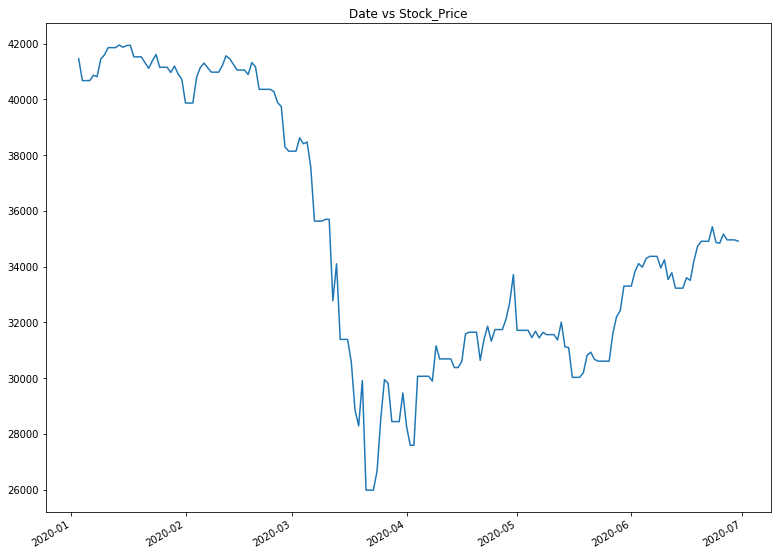

In [90]:
plt.figure(figsize=(13,10))
s_data["Close"].plot()
plt.title("Date vs Stock_Price")

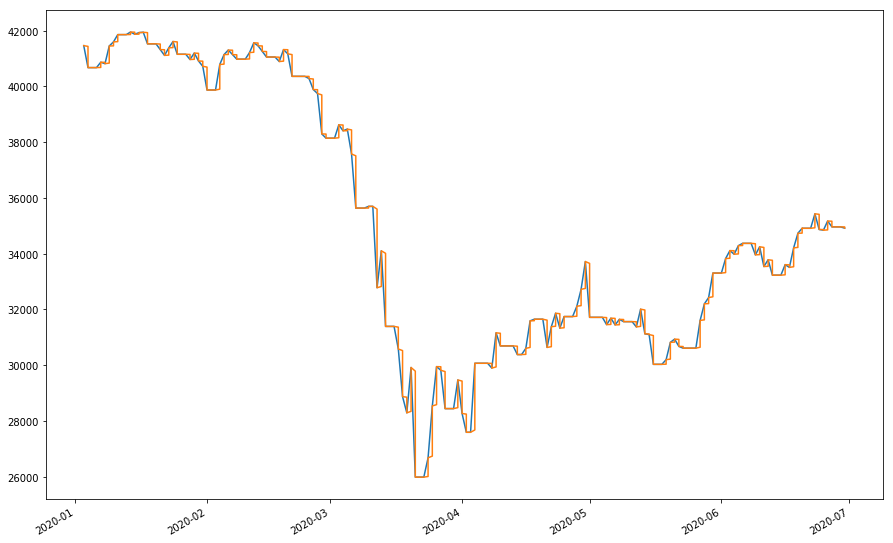

In [91]:
plt.figure(figsize=(15,10))
s_data["Close"].plot()
s_data.rolling(window=30).mean()['Close'].plot()

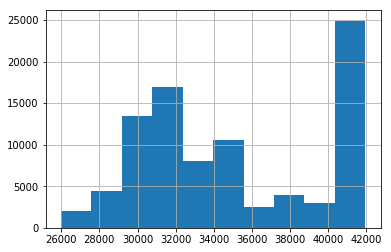

In [92]:
s_data['Close'].hist()

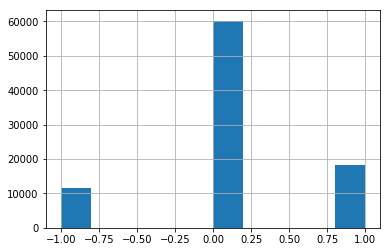

In [93]:
s_data['Result'].hist()

In [94]:
temp = pd.read_csv(r'C:/Users/Hafsa/Downloads/BSESN.csv')

In [95]:
temp.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis = 1, inplace = True)
temp

,Date,Open
0,2020-01-03,41634.511719
1,2020-01-06,41378.339844
2,2020-01-07,40983.039063
3,2020-01-08,40574.828125
4,2020-01-09,41216.671875
...,...,...
245,2020-12-28,47153.589844
246,2020-12-29,47466.621094
247,2020-12-30,47789.031250
248,2020-12-31,47753.109375


In [96]:
temp = temp.set_index('Date')
temp

,Open
Date,
2020-01-03,41634.511719
2020-01-06,41378.339844
2020-01-07,40983.039063
2020-01-08,40574.828125
2020-01-09,41216.671875
...,...
2020-12-28,47153.589844
2020-12-29,47466.621094
2020-12-30,47789.031250


In [97]:
s_data = s_data.merge(temp, left_index=True, right_index=True, how='inner')
s_data

,headline_text,Result,Close,Open
2020-01-03,bank holiday 2020,0,41464.609375,41634.511719
2020-01-03,mazya navryachi bayko update january 2 shanaya...,0,41464.609375,41634.511719
2020-01-03,yuva dancing queen judge sonalee kulkarni look...,1,41464.609375,41634.511719
2020-01-03,bank holiday january 2020 complete list,1,41464.609375,41634.511719
2020-01-03,hyderabad preferred destination multi crore ed...,0,41464.609375,41634.511719
...,...,...,...,...
2020-06-30,tiktok removed 1 65 crore video india,0,34915.800781,35168.300781
2020-06-30,apurva asrani call alia bhatts mother soni raz...,0,34915.800781,35168.300781
2020-06-30,kangana ranaut get doll version team share man...,1,34915.800781,35168.300781
2020-06-30,meezaan jaffrey reminisces childhood day grand...,1,34915.800781,35168.300781


In [99]:
def analyze_polarity(headline):
    result = TextBlob(headline)
    return result.sentiment.polarity

In [100]:
s_data['Polarity_score'] = np.array([analyze_polarity(headline) for headline in s_data['headline_text']])

In [101]:
s_data

,headline_text,Result,Close,Open,Polarity_score
2020-01-03,bank holiday 2020,0,41464.609375,41634.511719,0.000000
2020-01-03,mazya navryachi bayko update january 2 shanaya...,0,41464.609375,41634.511719,0.000000
2020-01-03,yuva dancing queen judge sonalee kulkarni look...,1,41464.609375,41634.511719,0.500000
2020-01-03,bank holiday january 2020 complete list,1,41464.609375,41634.511719,0.100000
2020-01-03,hyderabad preferred destination multi crore ed...,0,41464.609375,41634.511719,0.000000
...,...,...,...,...,...
2020-06-30,tiktok removed 1 65 crore video india,0,34915.800781,35168.300781,0.000000
2020-06-30,apurva asrani call alia bhatts mother soni raz...,0,34915.800781,35168.300781,0.000000
2020-06-30,kangana ranaut get doll version team share man...,1,34915.800781,35168.300781,0.136364
2020-06-30,meezaan jaffrey reminisces childhood day grand...,1,34915.800781,35168.300781,0.500000


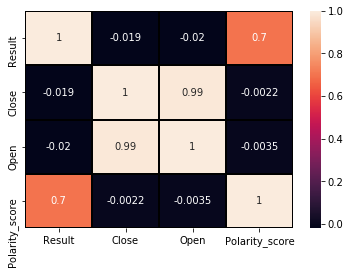

In [105]:
sns.heatmap(s_data.corr(), annot=True, linewidths=1, linecolor="black")

# Hybrid Model

In [1]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D

C:\Users\Hafsa\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.
C:\Users\Hafsa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Hafsa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Hafsa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type

In [114]:
dff

,headline_text,Result,Close,Open,Polarity_score
2020-01-03,bank holiday 2020,0,41464.609375,41634.511719,0.000000
2020-01-03,mazya navryachi bayko update january 2 shanaya...,0,41464.609375,41634.511719,0.000000
2020-01-03,yuva dancing queen judge sonalee kulkarni look...,1,41464.609375,41634.511719,0.500000
2020-01-03,bank holiday january 2020 complete list,1,41464.609375,41634.511719,0.100000
2020-01-03,hyderabad preferred destination multi crore ed...,0,41464.609375,41634.511719,0.000000
...,...,...,...,...,...
2020-06-30,tiktok removed 1 65 crore video india,0,34915.800781,35168.300781,0.000000
2020-06-30,apurva asrani call alia bhatts mother soni raz...,0,34915.800781,35168.300781,0.000000
2020-06-30,kangana ranaut get doll version team share man...,1,34915.800781,35168.300781,0.136364
2020-06-30,meezaan jaffrey reminisces childhood day grand...,1,34915.800781,35168.300781,0.500000


In [38]:
s_data = dff[['Close']]
s_data

,Close
Date,
2020-01-03,41464.609375
2020-01-04,40676.628906
2020-01-05,40676.628906
2020-01-06,40676.628906
2020-01-07,40869.468750
...,...
2020-12-28,47353.750000
2020-12-29,47613.078125
2020-12-30,47746.218750


In [344]:
#creating train and test sets
dataset = s_data.values

In [345]:
split_percent = 0.80
split = int(split_percent*len(dataset))
train = dataset[0:split,:]
valid = dataset[split:,:]

In [346]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [347]:
x_train, y_train = [], []
for i in range(73,len(train)):
    x_train.append(scaled_data[i-73:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [348]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [349]:
# create and fit the LSTM network
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))


In [350]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 73, 32)            128       
_________________________________________________________________
lstm_40 (LSTM)               (None, 73, 50)            16600     
_________________________________________________________________
lstm_41 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 51        
Total params: 36,979
Trainable params: 36,979
Non-trainable params: 0
_________________________________________________________________


In [351]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=13, batch_size=3, verbose=1)

Epoch 1/13
219/219 [==============================] - 42s 192ms/step - loss: 0.0169
Epoch 2/13
219/219 [==============================] - 12s 55ms/step - loss: 0.0040
Epoch 3/13
219/219 [==============================] - 12s 56ms/step - loss: 0.0030
Epoch 4/13
219/219 [==============================] - 12s 56ms/step - loss: 0.0024
Epoch 5/13
219/219 [==============================] - 12s 56ms/step - loss: 0.0024
Epoch 6/13
219/219 [==============================] - 12s 55ms/step - loss: 0.0020
Epoch 7/13
219/219 [==============================] - 12s 55ms/step - loss: 0.0018
Epoch 8/13
219/219 [==============================] - 12s 56ms/step - loss: 0.0016
Epoch 9/13
219/219 [==============================] - 12s 56ms/step - loss: 0.0016
Epoch 10/13
219/219 [==============================] - 12s 56ms/step - loss: 0.0014
Epoch 11/13
219/219 [==============================] - 12s 55ms/step - loss: 0.0013
Epoch 12/13
219/219 [==============================] - 13s 57ms/step - loss: 0.0013


In [352]:
inputs = s_data[len(s_data) - len(valid) - 73:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [353]:
X_test = []
for i in range(73,inputs.shape[0]):
    X_test.append(inputs[i-73:i,0])
X_test = np.array(X_test)

In [354]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

C:\Users\Hafsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


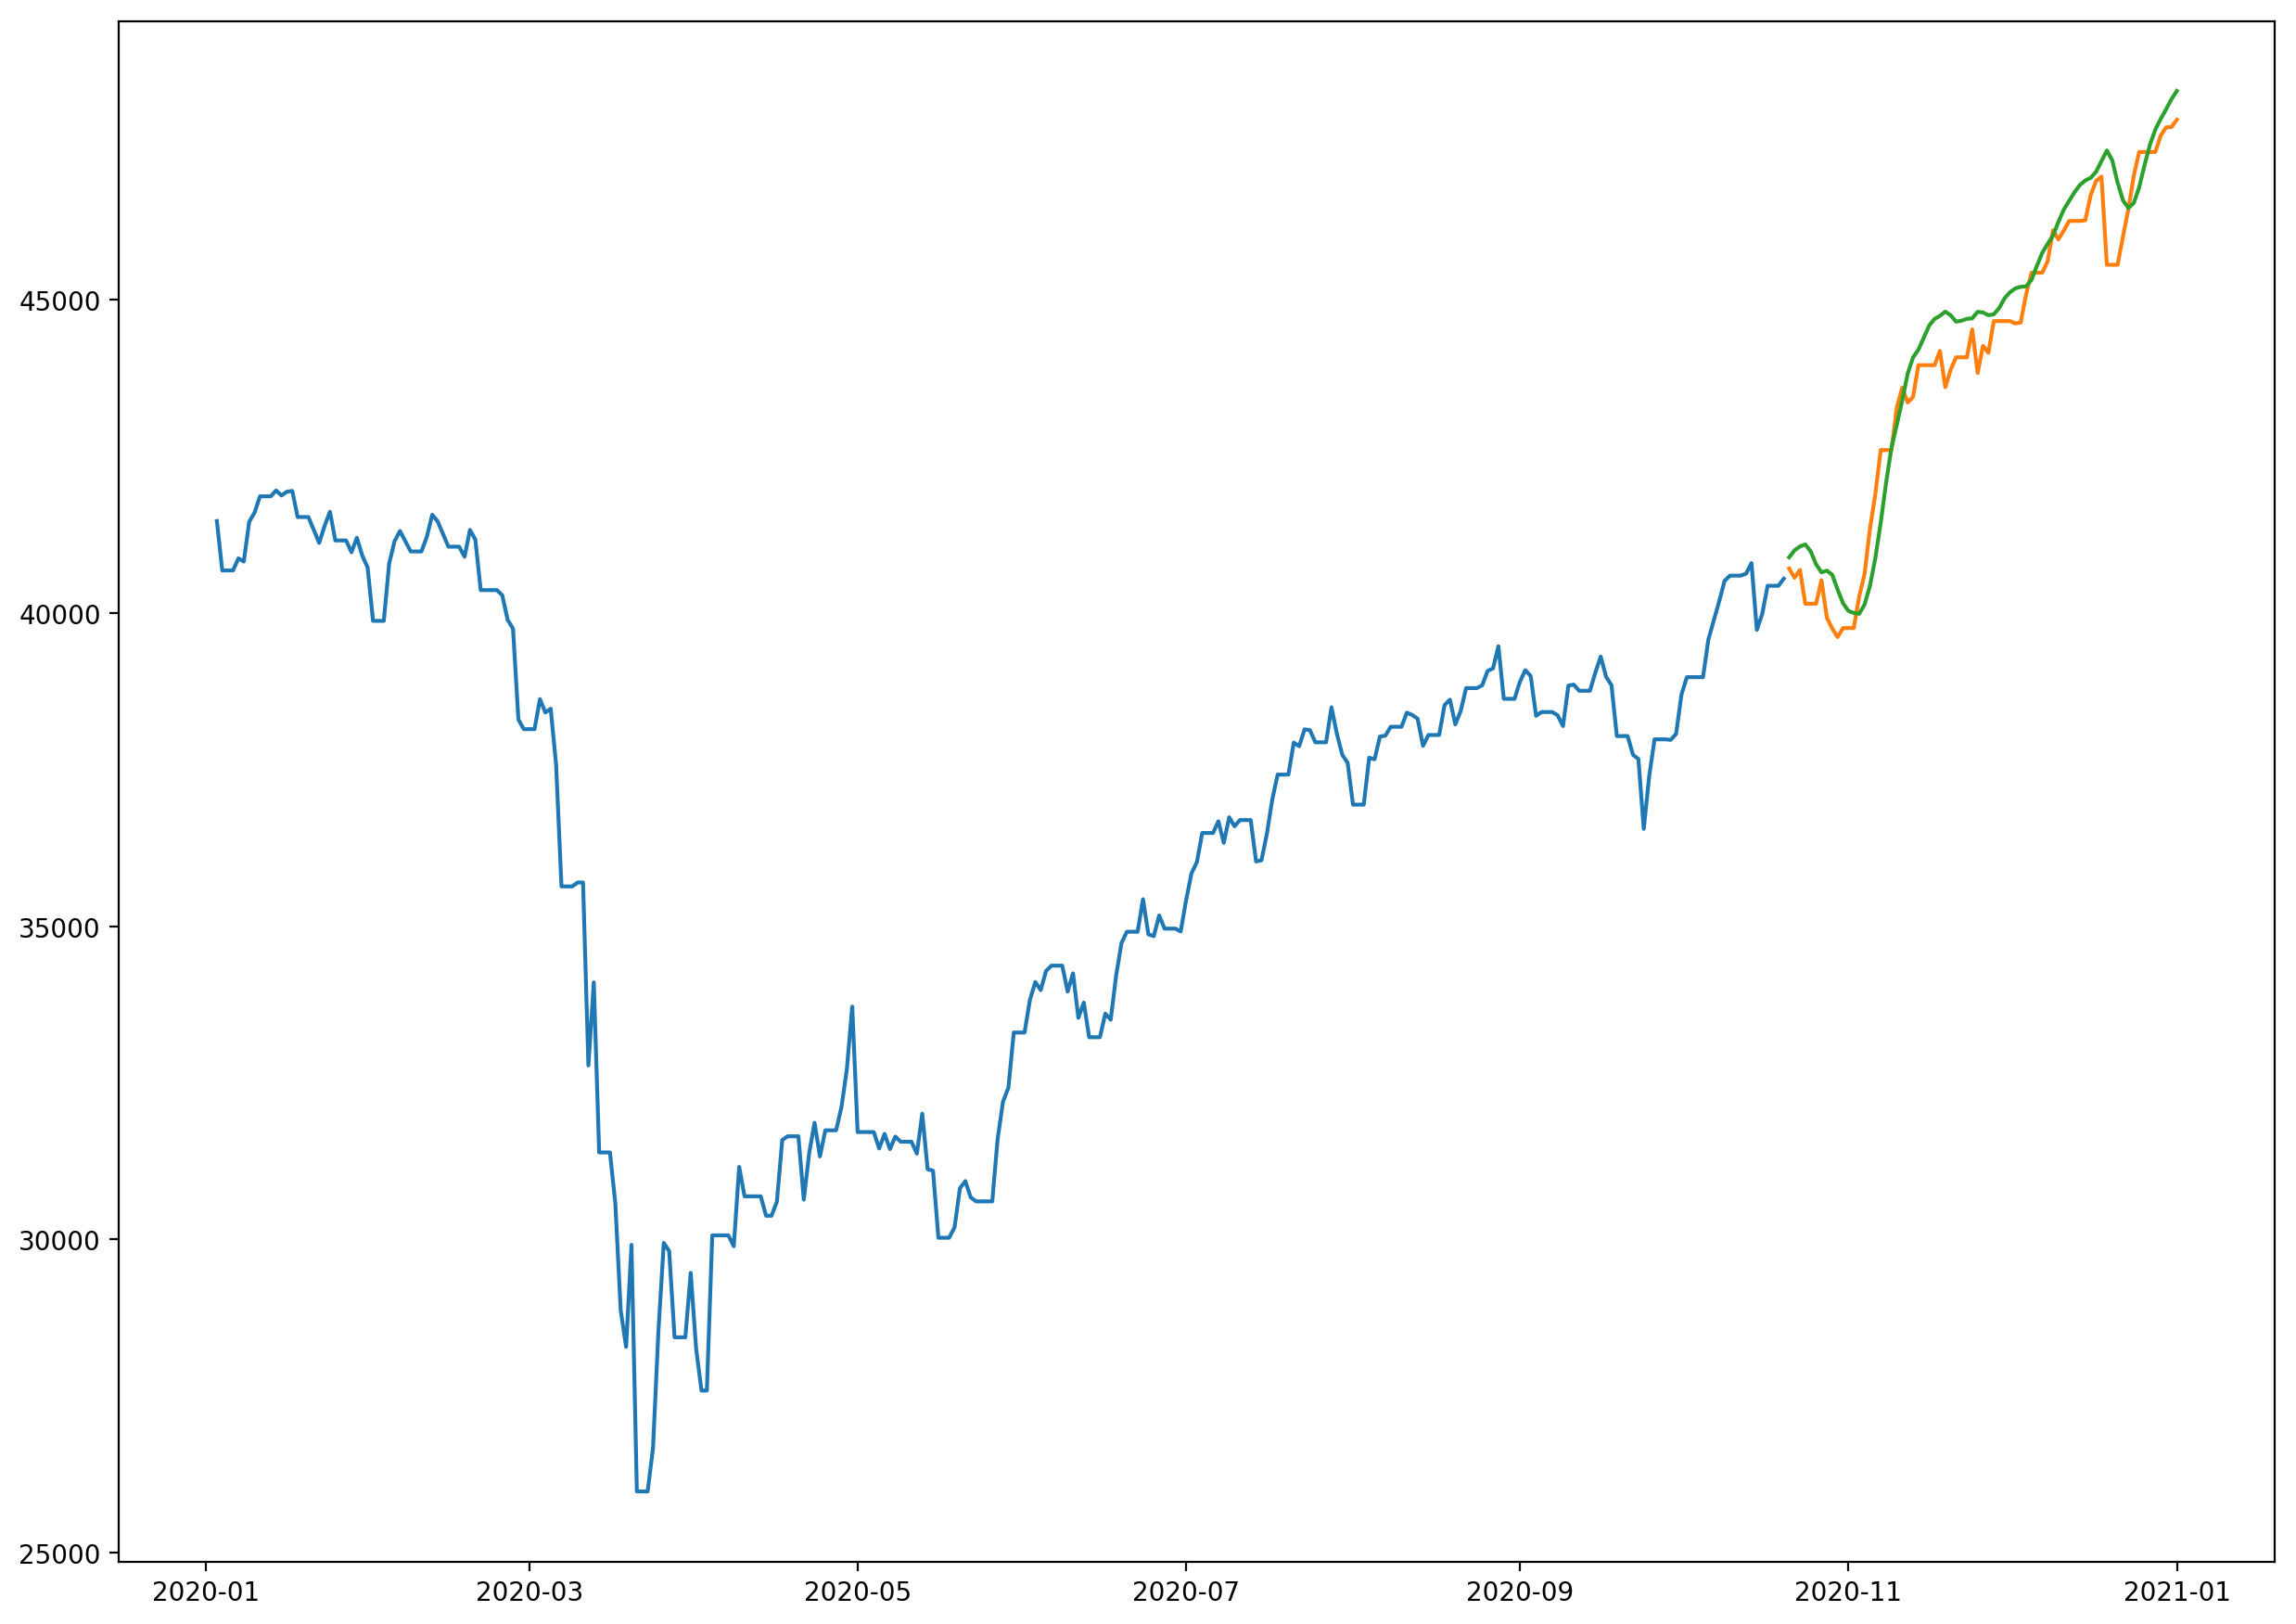

In [356]:
#for plotting
train = s_data[:split]
valid = s_data[split:]
valid['Predictions'] = closing_price
plt.figure(figsize=(15,11), dpi=200)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])